In [62]:
from copy import deepcopy
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np

from common.config import BASE_DIR

In [3]:
def load_input(is_test: bool = False) -> str:
    if is_test:
        with open(BASE_DIR / "y2024/d08/test.txt") as fh:
            return fh.read().strip()


def preprocess_data(data: str):
    return [list(line) for line in data.split("\n")]

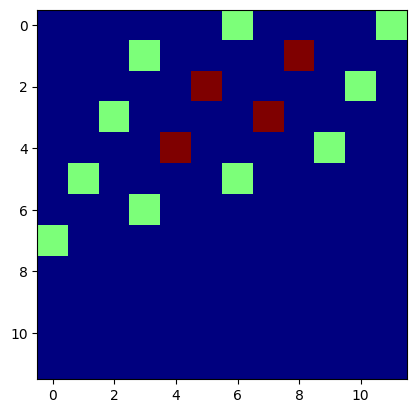

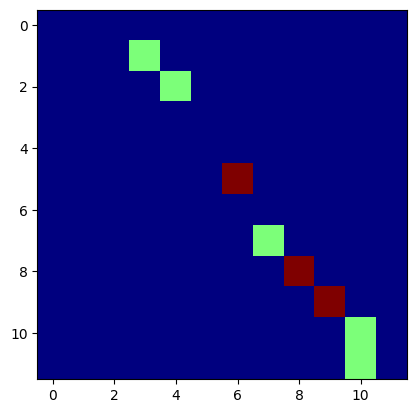

14

In [72]:
matrix = preprocess_data(load_input(True))
len_x = len(matrix[0])
len_y = len(matrix)
scale_factor = len_x * len_y
unique_frequencies = {
    matrix[j][i] for j in range(len_y) for i in range(len_x) if matrix[j][i] != "."
}
unique_antinodes = set()

for freq in unique_frequencies:
    freq_matrix = deepcopy(matrix)
    for j in range(len_y):
        for i in range(len_x):
            if freq_matrix[j][i] == freq:
                freq_matrix[j][i] = 1
            else:
                freq_matrix[j][i] = 0

    freq_array = np.array(freq_matrix, dtype=np.float32)
    antenna_where = np.where(freq_array == 1)
    antenna_locations = list(zip(antenna_where[1], antenna_where[0], strict=False))

    for j in range(len_y):
        for i in range(len_x):
            for (ax, ay), (bx, by) in combinations(antenna_locations, 2):
                dist_a = np.sqrt((i - ax) ** 2 + (j - ay) ** 2)
                angle_a = np.arctan2(j - ay, i - ax)
                dist_b = np.sqrt((i - bx) ** 2 + (j - by) ** 2)
                angle_b = np.arctan2(j - by, i - bx)

                if (
                    max(dist_a, dist_b) == 2 * min(dist_a, dist_b)
                    and angle_a == angle_b
                ):
                    if not ((i == ax and j == ay) or (i == bx and j == by)):
                        freq_array[j][i] = 0.5
                    unique_antinodes.add((i, j))

    plt.imshow(freq_array, cmap="jet")
    plt.show()

len(unique_antinodes)